### Import necessary libraries

In [3]:
import shasha
import pandas as pd
import numpy as np

In [4]:
from shasha import My_Multiple_Regression,My_Linear_Regression,My_Logistic_Regression,My_KNN,My_DecisionTree,My_Random_Forest

In [5]:
from shasha import My_SVM,My_XGBClassifier

In [6]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,mean_absolute_error  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold

### Linear Regression

In [4]:
data=pd.read_csv('./dataset/linear-salary/salary.csv')
data=data.iloc[:,1:]

In [5]:
X=data.loc[:,['YearsExperience']]
y=data.loc[:,['Salary']]

X=np.array(X)
y=np.array(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
my_l_model= My_Linear_Regression(learning_rate=0.01,epochs=1000)
my_l_model.fit(X_train,y_train)
y_pred=my_l_model.predict(X_test)
me= mean_absolute_error(y_test,y_pred)
print(me)


1905.249659312581


In [7]:
sk_l_model=LinearRegression()
sk_l_model.fit(X_train,y_train)
y_pred=sk_l_model.predict(X_test)
me= mean_absolute_error(y_test,y_pred)
print(me)

2446.17236904651


### Multiple Linear Regression

In [8]:

data=pd.read_csv('dataset/multi/insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df = pd.get_dummies(data, columns=['sex', 'region', 'smoker'],dtype=int)


In [10]:
X=df.drop('charges',axis=1)
y=df['charges']

X=StandardScaler().fit_transform(X)

X=np.array(X)
y=np.array(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
my_m_model= My_Multiple_Regression(learning_rate=0.01,epochs=400)
my_m_model.fit(X_train,y_train)
y_pred=my_m_model.predict(X_test)
me= mean_absolute_error(y_test,y_pred)
print(me)

3877.8428737436743


In [12]:
sk_m_model=LinearRegression()
sk_m_model.fit(X_train,y_train)
y_pred=sk_m_model.predict(X_test)
me= mean_absolute_error(y_test,y_pred)
print(me)

3955.2958896029786


### Logistic Regression

In [13]:
data=pd.read_csv('dataset/bank/bank-cleaned.csv')

In [14]:
X=data.drop('Y_yes',axis=1)
y=data['Y_yes']


X=np.array(X)
y=np.array(y)

X=StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
                                                    

In [15]:
my_log_model= My_Logistic_Regression(learning_rate=0.01,epochs=800)
my_log_model.fit(X_train,y_train)
y_pred=my_log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9083515416363195

In [16]:
sk_log_model=LogisticRegression()
sk_log_model.fit(X_train,y_train)
y_pred=sk_log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9149065307113377

Multiple Linear Regression

In [17]:

data=pd.read_csv('dataset/multi/insurance.csv')

# data.head()

In [18]:
df = pd.get_dummies(data, columns=['sex', 'region', 'smoker'],dtype=int)

In [19]:
X=df.drop('charges',axis=1)
y=df['charges']

X=StandardScaler().fit_transform(X)

X=np.array(X)
y=np.array(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
my_m_model= My_Multiple_Regression(learning_rate=0.01,epochs=400)

my_m_model.fit(X_train,y_train)

y_pred=my_m_model.predict(X_test)

me= mean_absolute_error(y_test,y_pred)
print(me)

3877.8428737436743


In [21]:
sk_m_model=LinearRegression()

sk_m_model.fit(X_train,y_train)

y_pred=sk_m_model.predict(X_test)

me= mean_absolute_error(y_test,y_pred)

print(me)


3955.2958896029786


### Decision Tree

In [22]:
data=pd.read_csv('dataset/wine/winequality-red.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
X=data.drop('quality',axis=1)
y=data['quality']

X=np.array(X)
y=np.array(y)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:

mytree=My_DecisionTree(max_depth=3,min_samples_split=3)
mytree.fit(X_train,y_train)
y_pred=mytree.predict(X_test)
accuracy_score(y_test,y_pred)

0.575

In [26]:
sk_dt_model=DecisionTreeClassifier(max_depth=3,min_samples_split=3)
sk_dt_model.fit(X_train,y_train)
y_pred=sk_dt_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.565625

### Random Forest

In [27]:
%%notify
myforest=My_Random_Forest(n_trees=20,max_depth=90,min_samples_split=3)
myforest.fit(X_train,y_train)
y_pred=myforest.predict(X_test)
accuracy_score(y_test,y_pred)


Execution Completed!


In [28]:

myforest=RandomForestClassifier(n_estimators=20,max_depth=90,min_samples_split=3)
myforest.fit(X_train,y_train)
y_pred=myforest.predict(X_test)
accuracy_score(y_test,y_pred)


0.715625

### KNN

In [29]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


df = pd.read_csv(url, header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
X = df.iloc[:,:-1]


y = df.iloc[:,-1]

In [31]:
from helper import Helper
model = My_KNN(3)
skmodel = KNeighborsClassifier(n_neighbors=3)
Helper.compare_knn(X,y,[model,skmodel])


My_KNN
30 out of 30


KNeighborsClassifier
30 out of 30




### K-Fold Cross Validation

In [32]:
iris = load_breast_cancer()
X = iris.data
y = iris.target


np.shape(iris.target)
import pandas as pd
import numpy as np
data=pd.read_csv('dataset/bank/bank-cleaned.csv')
X=data.drop('Y_yes',axis=1)
y=data['Y_yes']


X=np.array(X)
y=np.array(y)

###### <a id='toc1_1_8_1_1_1_'></a>[Comparing best logistic regression model and sk learn model](#toc0_)

In [33]:

kf = KFold(n_splits=5,shuffle=True,random_state=42)
models=[]

acc=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)
    model =My_Logistic_Regression(learning_rate=0.01,epochs=800)
    model.fit(X_train,y_train)
    models.append(model)
    y_pred=model.predict(X_train)
    acci=accuracy_score(y_train,y_pred)
    print(acci)
    acc+=acci

acc/5

0.9055538694992413
0.9052503793626707
0.9079817905918057
0.9049497739067099
0.9064368304452065


0.9060345287611268

In [34]:
#Best  Logistic Model
y_pred=models[2].predict(X_test)
print(accuracy_score(y_test,y_pred))


0.9046983124924123


In [35]:
sk_log_model=LogisticRegression()
sk_log_model.fit(X_train,y_train)
y_pred=sk_log_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9065193638460605

###### <a id='toc1_1_8_1_1_2_'></a>[Comparing best decision tree model and sklearn](#toc0_)

In [36]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
models=[]

acc=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)
    model =My_DecisionTree(max_depth=3,min_samples_split=3)
    model.fit(X_train,y_train)
    models.append(model)
    y_pred=model.predict(X_train)
    acci=accuracy_score(y_train,y_pred)
    print(acci)
    acc+=acci

acc/5

0.9034901365705614
0.9084370257966616
0.9041578148710167
0.9071044884828988
0.9033716730903463


0.905312227762297

In [37]:
#Best Decision Tree Model
y_pred=models[1].predict(X_test)
accuracy_score(y_test,y_pred)

0.9076119946582494

In [38]:
sk_dc_model=DecisionTreeClassifier(max_depth=3,min_samples_split=3)
sk_dc_model.fit(X_train,y_train)
y_pred=sk_dc_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9094330460118976

###### <a id='toc1_2_4_1_1_3_'></a>[Comparing best random forest  model and sklearn](#toc0_)

In [39]:
%%notify
kf = KFold(n_splits=5,shuffle=True,random_state=42)
models=[]
acc=0
for train_index,test_index in kf.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)
    model=My_Random_Forest(n_trees=5,max_depth=10,min_samples_split=3)
    model.fit(X_train, y_train)
    models.append(model)
    y_pred = model.predict(X_train)
    acci = accuracy_score(y_train, y_pred)
    print(acci)
    acc+=acci

acc/5

0.9329893778452201
0.9344157814871017
0.9357814871016692
0.935328214621711
0.9333859366938788
Execution Completed!


In [40]:
y_pred=models[1].predict(X_test)
accuracy_score(y_test,y_pred)

0.8806604346242564

In [41]:
sk_rf_model=RandomForestClassifier()
sk_rf_model.fit(X_train,y_train)
y_pred=sk_rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9106470802476629

### Support Vector Machines

In [8]:
iris = load_breast_cancer()
X = iris.data
y = iris.target


np.shape(iris.target)
import pandas as pd
import numpy as np
data=pd.read_csv('dataset/bank/bank-cleaned.csv')
X=data.drop('Y_yes',axis=1)
y=data['Y_yes']


X=np.array(X)
y=np.array(y)

In [9]:

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [12]:
%%notify

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score as accuracy

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = My_SVM(learning_rate=0.001, lambda_param=0.5, epochs=1200)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)
print(y_test)

print("SVM classification accuracy", accuracy(y_test, predictions))

100%|██████████| 1200/1200 [00:06<00:00, 173.48it/s]

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
SVM classification accuracy 0.8998543335761107


Execution Completed!


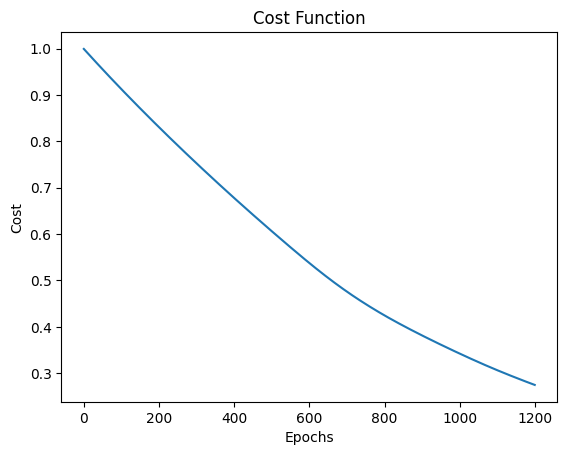

In [12]:
import matplotlib.pyplot as plt

plt.plot(clf.cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# print("SVM classification accuracy", accuracy_score(y_test, predictifons))

SVM classification accuracy 0.9019179412478757


### XGBoost


In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

data = pd.read_csv("dataset/bank/bank-cleaned.csv")
X = data.drop("Y_yes", axis=1)
y = data["Y_yes"]


X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [51]:
# X,y = make_classification(n_samples=10, n_features=5, n_classes=2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
xgb = My_XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
probabilities = xgb.predict_proba(X_test)
accuracy_score(y_test, predictions)

100%|██████████| 10/10 [00:25<00:00,  2.51s/it]


0.9055596018451081

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test,predictions)

0.9021607186210245

### Decision Tree Regressor

In [17]:
data = pd.read_csv("dataset/linear-salary/salary.csv")

data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [18]:

X = StandardScaler().fit_transform(X)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
from dc import My_DecisionTree_Regressor

In [20]:
model=My_DecisionTree_Regressor(max_depth=100,min_samples_split=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_train)
mean_absolute_error(y_train,y_pred)

np.float64(0.0)

In [21]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

np.float64(0.10730759893177956)

In [22]:
y_pred[:10]

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [23]:
y_test[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=100,min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
mean_absolute_error(y_train, y_pred)


np.float64(0.0)

In [27]:
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

np.float64(0.11070648215586307)